# Notebook Regression - Diamonds price dataset

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import sklearn
import os as os

#### Imortation du jeu de données et affichage de l'entête

In [44]:
data_pd = pd.read_csv("diamonds.csv", na_values = '')
size_dataset = data_pd.shape
print( "Rows = ", size_dataset[0])
print( "Columns = ", size_dataset[1])
columns = data_pd.columns
print(columns, type(columns))
data_pd.head()

Rows =  53940
Columns =  11
Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object') <class 'pandas.core.indexes.base.Index'>


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
data_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [6]:
data_pd.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,53940.0,26970.500000,15571.281097,1.0,13485.75,26970.50,40455.25,53940.00
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [7]:
print(data_pd.values[10])

[11 0.3 'Good' 'J' 'SI1' 64.0 55.0 339 4.25 4.28 2.73]


#### Mise en forme du jeu de données

In [ ]:
data = data_pd.values
y = data[:,7]

# ID de l'enregistrement
X_id = data[:,0]
# Données
X = np.concatenate((data[:,1:7], data[:,8:]), axis = 1)

print("X shape :", X.shape)

X shape : (53940, 9)


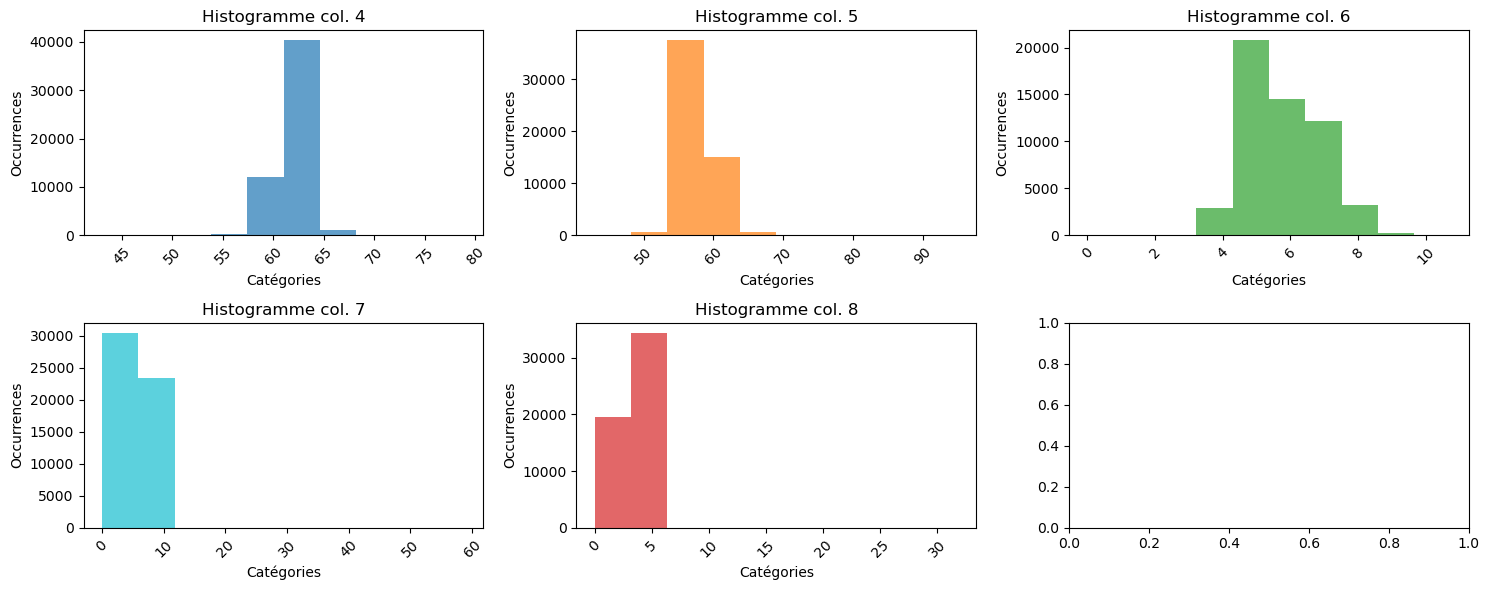

In [29]:
index_texte = [4,5,6,7,8]

fig, axes = plt.subplots(2, 3, figsize=(15, 6))
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:cyan','tab:red','tab:yellow' ] 
axes = axes.ravel()

for ax, k, color in zip(axes, index_texte, colors):
    array = X[:, k]
    #unique, counts = np.unique(array, return_counts=True)

    ax.hist(array, bins=10, color  = color, alpha= 0.7)
    ax.set_xlabel("Catégories")
    ax.set_ylabel("Occurrences")
    ax.set_title(f"Histogramme col. {k}")
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

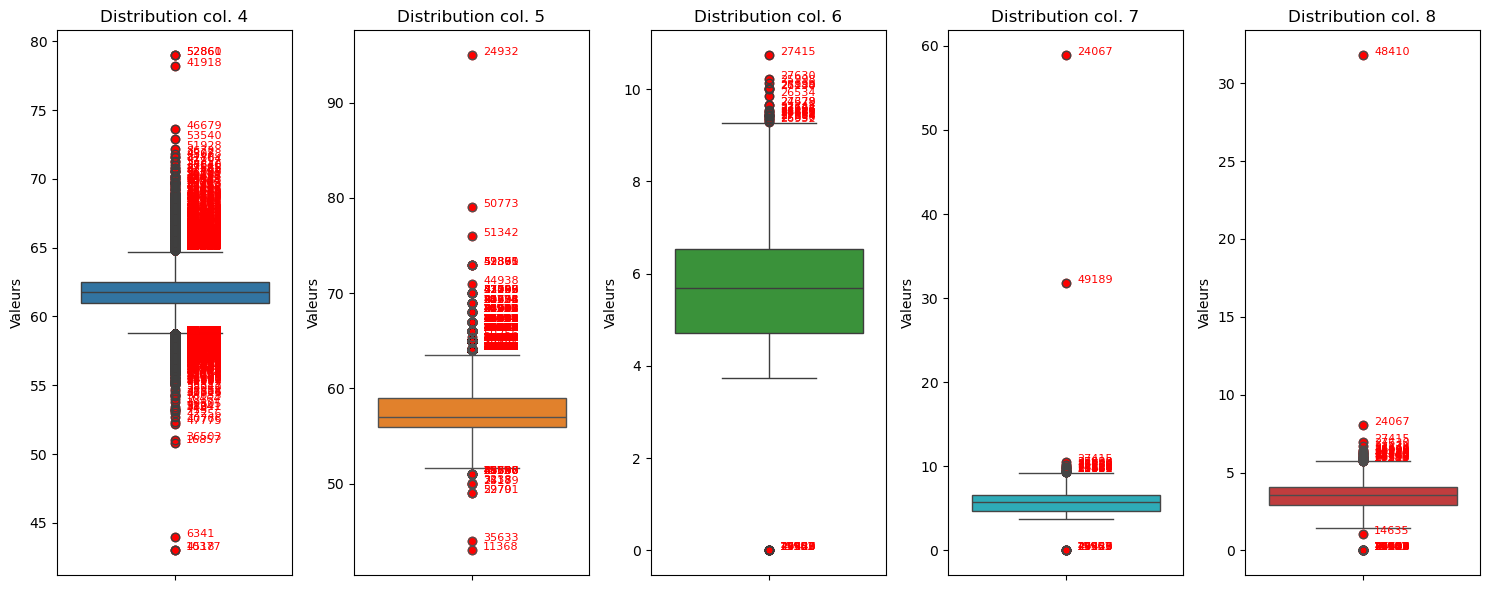

In [43]:
import seaborn as sns

index_texte = [4, 5, 6, 7, 8]

fig, axes = plt.subplots(1, 5, figsize=(15, 6))
axes = axes.ravel()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:cyan', 'tab:red', 'tab:purple']

for ax, k, color in zip(axes, index_texte, colors):
    array = X[:, k].astype(float)  # ✅ conversion en numérique
     
    
    # Calcul Q1, Q3 et IQR
    Q1 = np.percentile(array, 25)
    Q3 = np.percentile(array, 75)
    IQR = Q3 - Q1

    # Seuils outliers
    low = Q1 - 1.5 * IQR
    high = Q3 + 1.5 * IQR

    outliers_index = np.where((array < low) | (array > high))[0]
    outliers_values = array[outliers_index]

    for i, (idx, val) in enumerate(zip(outliers_index, outliers_values)):
        ax.scatter(0, val, color='red')  # point
        ax.text(0.05, val, str(idx), fontsize=8, color='red')  # id

    sns.boxplot(y=array, ax=ax, color=color)
    ax.set_xlabel("")  # pas pertinent ici
    ax.set_ylabel("Valeurs")
    ax.set_title(f"Distribution col. {k}")
    ax.tick_params(axis='x', labelbottom=False)  # Pas de labels x

plt.tight_layout()
plt.show()


In [ ]:
index_texte = [1,2,3]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
colors = ['tab:blue', 'tab:orange', 'tab:green'] 

for ax, k, color in zip(axes, index_texte, colors):
    array = X[:, k]
    unique, counts = np.unique(array, return_counts=True)

    ax.bar(unique, counts, color=color)
    ax.set_xlabel("Catégories")
    ax.set_ylabel("Occurrences")
    ax.set_title(f"Histogramme col. {k}")
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### Séparation de l'ensemble de test et d'apprentissage

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=45, train_size= 0.80)

print('Taille train : ', X_train.shape, ",", y_train.shape)
print("Taille test : ", X_test.shape, ",", y_test.shape)

Taille train :  (43152, 9) , (43152,)
Taille test :  (10788, 9) , (10788,)


#### Normalisation et centrage des données

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Ajuster aux valeurs d'apprentissage
scaler.fit(X_train)

ValueError: could not convert string to float: 'Premium'